In [52]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [76]:
datafile = "/home/ctroupin/Data/COVID/DonnéesVaccination.xlsx"
data = pd.read_excel(datafile, usecols="A,D,E,F,G,I:N", skiprows=4)
city1 = "Verviers"
city2 = "Esneux"
city3 = "Visé"

In [77]:
data1 = data.loc[data["Commune"] == city1]
data1_subset = data1[["Semaine", "Tranche d'âge", "Nbre Pers Ayant Recu Au Moins1Dose", 
                                      "Nbre Pers Partiellement Vaccinées", "Nbre Pers Totalement Vaccinées"]]
data2 = data.loc[data["Commune"] == city2]
data2_subset = data2[["Semaine", "Tranche d'âge", "Nbre Pers Ayant Recu Au Moins1Dose", 
                                      "Nbre Pers Partiellement Vaccinées", "Nbre Pers Totalement Vaccinées"]]
data3 = data.loc[data["Commune"] == city3]
data3_subset = data3[["Semaine", "Tranche d'âge", "Nbre Pers Ayant Recu Au Moins1Dose", 
                                      "Nbre Pers Partiellement Vaccinées", "Nbre Pers Totalement Vaccinées"]]

In [64]:
def count_persons(data_subset):
    timevector = []
    n1dose = []
    npart = []
    ntotal = []
    for time in verviers_data_subset["Semaine"].unique():
        timevector.append(time)
        goodlines = (data_subset["Semaine"] == time)
        n1dose.append(data_subset["Nbre Pers Ayant Recu Au Moins1Dose"][goodlines].sum())
        npart.append(data_subset["Nbre Pers Partiellement Vaccinées"][goodlines].sum())
        ntotal.append(data_subset["Nbre Pers Totalement Vaccinées"][goodlines].sum())
    return timevector, n1dose, npart, ntotal

In [68]:
def get_dates(timevector):
    dates = []
    for times in timevector:
        day, month = times.replace('Sem.', '').split("/")
        dd = int(day)
        mm = int(month)
        if mm > 8:
            year = 2020
        else: 
            year = 2021
        dates.append(datetime.date(year, mm, dd))
    return dates

In [82]:
timevector1, n1dose1, npart1, ntotal1 = count_persons(data1_subset)
timevector2, n1dose2, npart2, ntotal2 = count_persons(data2_subset)
timevector3, n1dose3, npart3, ntotal3 = count_persons(data3_subset)

dates1 = get_dates(timevector1)
dates2 = get_dates(timevector2)
dates3 = get_dates(timevector3)

In [87]:
pverviers = 55198 * 0.77 
pesneux = 12889 * 0.81
pvise = 17767 * 0.79

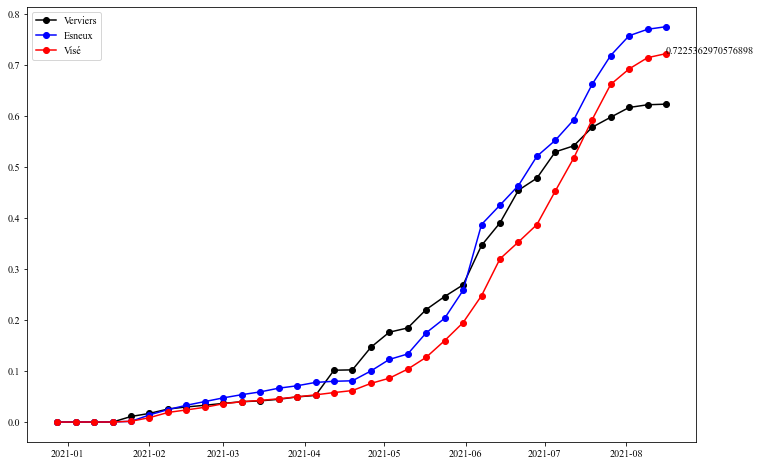

In [131]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(dates1, np.array(ntotal1) / pop_age1[12:].sum(), "ko-", label=city1)
ax.plot(dates2, np.array(ntotal2) / pop_age2[12:].sum(), "bo-", label=city2)
ax.plot(dates3, np.array(ntotal3) / pop_age3[12:].sum(), "ro-", label=city3)
ax.text(dates3[-1], (np.array(ntotal3) / pop_age3[12:].sum())[-1], 
        str(np.array(ntotal3)[-1] / pop_age3[12:].sum()), ha="left")
plt.legend()
plt.show()

In [85]:
n1dose3

[0,
 21,
 139,
 344,
 437,
 487,
 580,
 635,
 674,
 788,
 964,
 1424,
 2076,
 2286,
 2880,
 3333,
 3858,
 4446,
 5155,
 5988,
 6477,
 6893,
 7658,
 8650,
 9487,
 10355,
 10729,
 10910,
 11066,
 11280,
 11482,
 11662,
 11771,
 11808]

In [124]:
def get_pop_age(city):
    popfile = "/home/ctroupin/Data/COVID/TF_SOC_POP_STRUCT_2021.txt"
    population_age = np.zeros(110)
    with open(popfile, "r") as pf:
        ii = 0
        for lines in pf:
            ii += 1
            linesplit = lines.split("|")
            if linesplit[2] == city:
                pop = int(linesplit[-1])
                age = int(linesplit[-2])
                population_age[age] += pop
    return population_age

In [125]:
pop_age1 = get_pop_age(city1)
pop_age2 = get_pop_age(city2)
pop_age3 = get_pop_age(city3)

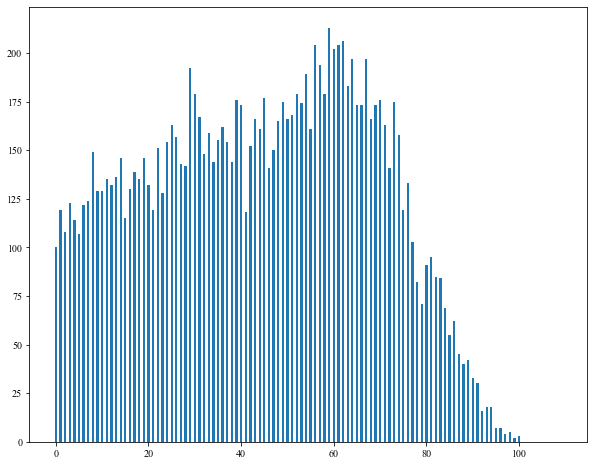

In [118]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
ax.bar(np.arange(0, 110), pop_age2, width=.5)
plt.show()

In [126]:
pop_age3

array([143., 181., 159., 207., 171., 208., 206., 174., 207., 231., 211.,
       201., 232., 197., 184., 207., 212., 242., 225., 213., 215., 210.,
       196., 219., 227., 169., 189., 188., 201., 209., 222., 218., 222.,
       185., 217., 212., 192., 191., 237., 215., 221., 239., 249., 247.,
       246., 226., 247., 237., 250., 233., 246., 233., 216., 241., 251.,
       236., 239., 259., 252., 257., 279., 252., 234., 256., 214., 231.,
       194., 208., 215., 199., 208., 201., 214., 189., 182., 147., 123.,
       136., 102.,  94., 126., 125., 106., 104.,  75.,  99.,  57.,  60.,
        54.,  56.,  31.,  35.,  30.,  19.,  17.,   8.,   5.,   2.,   4.,
         1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])